## Imports

In [3]:
import numpy as np;
import matplotlib.pyplot as plt;
import scipy.fft as fft;

Data imports

In [4]:
filepath = "../Output/2param_acc_Option1_finegrid/";
filepath2 = "../Output/2param_acc_Option2_finegrid/";
AList = np.loadtxt(filepath + "Acceleration.txt");
VList = np.loadtxt(filepath + "LatticeDepth.txt");

AVListIndex = np.loadtxt(filepath + "AVIndex.txt", dtype = int);
MomProb_1 = np.loadtxt(filepath + "MomentumProbability.txt"); # np array with rows containing momentum probabilities for each [a,V] value pair in AVList

MomProb_2 = np.loadtxt(filepath2 + "MomentumProbability.txt"); # np array with rows containing momentum probabilities for each [a,V] value pair in AVList


## Units

In [5]:
#Lambda = 852*10**(-9);
Lambda = 1064*10**(-9);
k_L = 2*np.pi / Lambda;
hbar = 1.054571817*10**(-34);
atomicmass = 86.90918;
massDalton = 1.660539*10**(-27);
mass = atomicmass * massDalton;
E_R = (hbar * k_L)**2 /(2*mass);
g=9.81;
accUnit= 2*(E_R)**2/(hbar**2*k_L);

In [7]:
realacc = 0.025*9.81;
codeacc = realacc/accUnit
print(codeacc)

0.004460683745434248


## Comparing Bayesian Updating and JSD for two sequences

### First Sequence Bayesian updating

In [9]:
PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);
datamom =np.reshape(MomProb_1, (AList.size,VList.size,11));


a0= 0.0; V0= 0.0;
P_actual=np.array(datamom[50,25,:]);

P_actual=P_actual/np.sum(P_actual);
P_simulated = P_actual; #No errors

Runs=2000; # How many simulated data do we want
outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_simulated);
unique, frequency = np.unique(outcomes, return_counts = True);

PaVprior = np.full((AList.size, VList.size),1)/(AList.size*VList.size);

plotPaV=np.array([PaVprior]);
counterstep = 5;
counter =0;
for m in outcomes:
    for i in range(AList.size*VList.size):
        indexpair = AVListIndex[i];
        MomentumProbabilities = MomProb_1[i];

        PaVprior[indexpair[0], indexpair[1]] *= (MomentumProbabilities[m])
        PaVprior/=np.sum(PaVprior)

    counter+=1;
    if counter % counterstep and counter < 200:
        plotPaV=np.append(plotPaV,[PaVprior], axis=0); 

### Second Sequence Bayesian Updating

In [10]:
PossibleMomentumOutcomes =np.array( [-10+2*i for i in range(0,11)]); # values of momentum in n\hbar k_L
PossibleOutcomes = range(0,11);
datamom =np.reshape(MomProb_2, (AList.size,VList.size,11));


a0= 0.0; V0= 0.0;
P_actual=np.array(datamom[50,25,:]);

P_actual=P_actual/np.sum(P_actual);
P_simulated = P_actual; #No errors

Runs=2000; # How many simulated data do we want
outcomes = np.random.default_rng().choice(PossibleOutcomes,size=Runs, p = P_simulated);
unique, frequency = np.unique(outcomes, return_counts = True);

PaVprior = np.full((AList.size, VList.size),1)/(AList.size*VList.size);

plotPaV2=np.array([PaVprior]);
counterstep = 5;
counter =0;
for m in outcomes:
    for i in range(AList.size*VList.size):
        indexpair = AVListIndex[i];
        MomentumProbabilities = MomProb_2[i];

        PaVprior[indexpair[0], indexpair[1]] *= (MomentumProbabilities[m])
        PaVprior/=np.sum(PaVprior)

    counter+=1;
    if counter % counterstep and counter < 200:
        plotPaV2=np.append(plotPaV2,[PaVprior], axis=0); 

### Plotting Comparison Between the Two

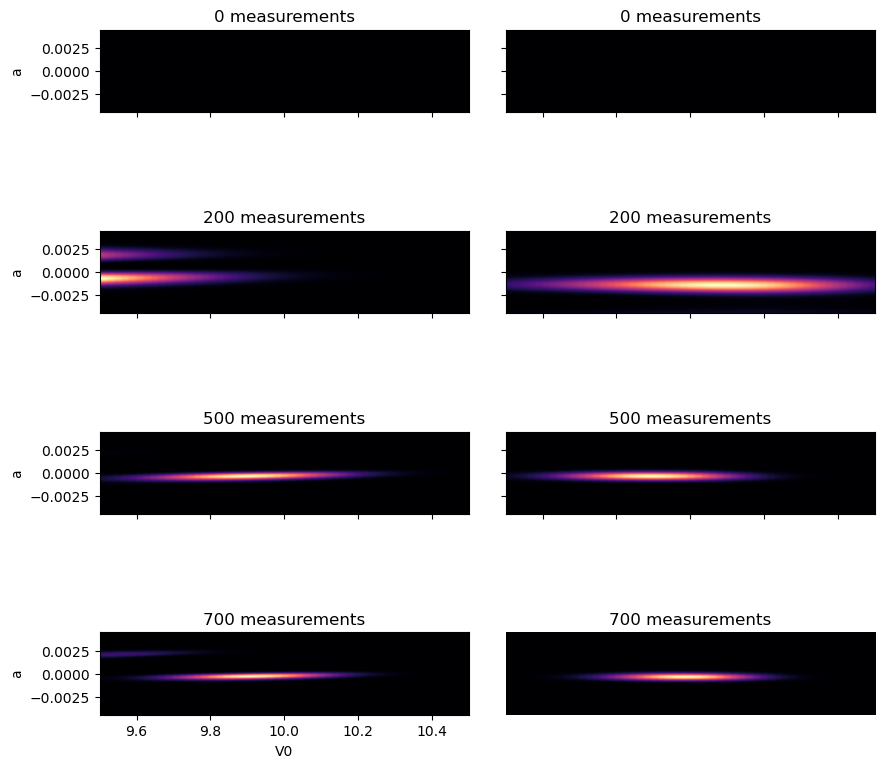

In [12]:
fig=plt.figure(figsize=(10,10))
gs = fig.add_gridspec(4, 2, hspace=0.2, wspace=0.1)
axs = gs.subplots(sharex='col', sharey='row')
axs[-1,-1].axis("off");

measure_points = [ 0, 20, 50 , 70];

for i in range(len(measure_points)):
    ax = axs[i, 0];
    im=ax.imshow(plotPaV[measure_points[i]], cmap = "magma" , extent =[VList[0],VList[-1],AList[0],AList[-1]], aspect=25);

    ax.set_title(str(10*measure_points[i])+" measurements")
    ax.set_xlabel("V0")
    ax.set_ylabel("a")

    ax = axs[i, 1];
    im=ax.imshow(plotPaV2[measure_points[i]], cmap = "magma" , extent =[VList[0],VList[-1],AList[0],AList[-1]], aspect=25);

    ax.set_title(str(10*measure_points[i])+" measurements")
    ax.set_xlabel("V0")
    ax.set_ylabel("a")

#fig.colorbar(im,  orientation='vertical')


for ax in fig.get_axes():
    ax.label_outer()

plt.show()